# Gene Ontology Semantic Similarity Analysis

In [1]:
suppressPackageStartupMessages({
    library(dplyr)
    library(ggplot2)
    library(GOSemSim)
    library(org.Hs.eg.db)
})

## Functions

In [2]:
get_semData <- function(ont){
    return(godata('org.Hs.eg.db', ont=ont))
}

save_img <- function(image, fn, w=7, h=7){
    for(ext in c(".pdf", ".png")){
        ggsave(file=paste0(fn, ext), plot=image, width=w, height=h)
    }
}   

GO_semantic_similarity <- function(ont){
    hsGO = get_semData(ont)
    tissues = c("Caudate", "DLPFC", "Hippocampus")
    t1 = c(); t2 = c(); ss = c()
    for(tissue1 in c("Caudate", "DLPFC")){
        fn1 = paste0("../../_m/", tolower(tissue1), "_functional_enrichment.txt")
        for(tissue2 in c("DLPFC", "Hippocampus")){
            fn2 = paste0("../../_m/", tolower(tissue2), "_functional_enrichment.txt")
            if(tissue1 != tissue2 & file.exists(fn1) & file.exists(fn2)){
                df1 = data.table::fread(fn1) %>% filter(source == paste0("GO:", ont))
                df2 = data.table::fread(fn2) %>% filter(source == paste0("GO:", ont))
                sim = mgoSim(df1$term_id, df2$term_id, semData=hsGO, 
                             measure="Wang", combine="BMA")
                t1 = c(t1, tissue1); t2 = c(t2, tissue2);ss = c(ss, sim)
            }
        }
    }
    return(data.frame("Tissue_1"=t1, "Tissue_2"=t2, "Semantic_Similarity"=ss, "Ont"=ont))
}

## Semantic similarity analysis

In [3]:
datalist = list()
for(ont in c("MF", "BP", "CC")){
    datalist[[ont]] = GO_semantic_similarity(ont)
}
dt = bind_rows(datalist) %>% mutate_if(is.character, as.factor) 
dt %>% data.table::fwrite("go_semantic_similarity.tsv", sep='\t')
dt %>% head

preparing gene to GO mapping data...

preparing IC data...

preparing gene to GO mapping data...

preparing IC data...

preparing gene to GO mapping data...

preparing IC data...



,Tissue_1,Tissue_2,Semantic_Similarity,Ont
,<fct>,<fct>,<dbl>,<fct>
1,Caudate,DLPFC,0.971,MF
2,Caudate,Hippocampus,0.946,MF
3,DLPFC,Hippocampus,0.976,MF
4,Caudate,DLPFC,0.919,BP
5,Caudate,Hippocampus,0.873,BP
6,DLPFC,Hippocampus,0.957,BP


## Plot semantic similarity

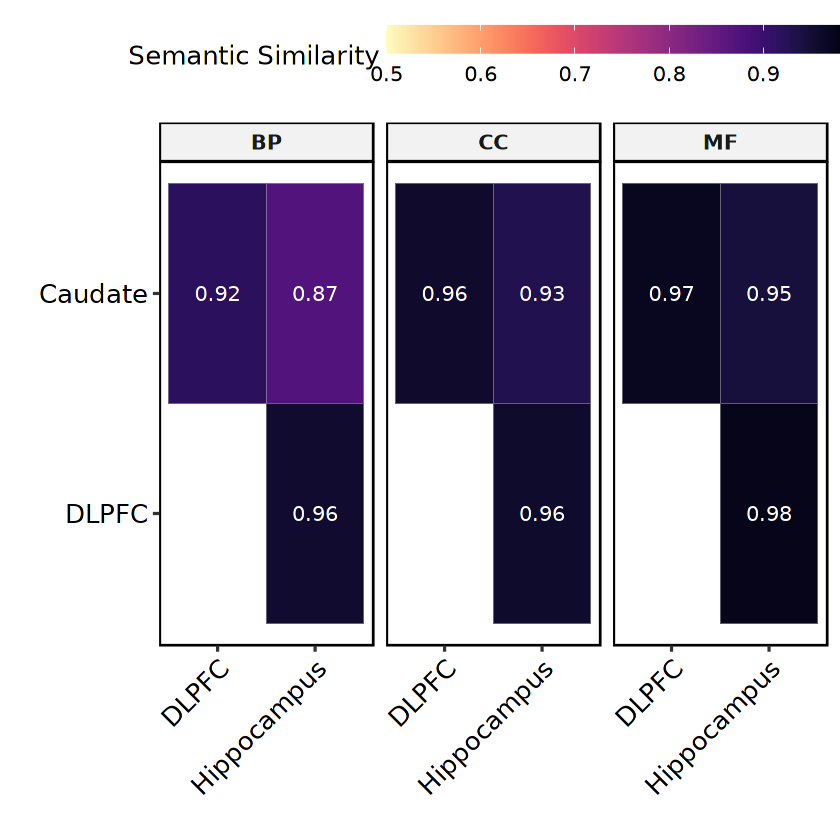

In [4]:
tile_plot <- dt %>% #tidyr::drop_na() %>% 
    ggplot(aes(x=Tissue_2, y=Tissue_1, fill=Semantic_Similarity, 
               label=format(round(Semantic_Similarity, 2)))) + 
    geom_tile(color="grey") + ggfittext::geom_fit_text(contrast=TRUE) + 
    viridis::scale_color_viridis(option="magma") + facet_wrap("~Ont") +
    viridis::scale_fill_viridis(name="Semantic Similarity", limits=c(0.5,1),
                                direction=-1, option="magma") +
    labs(x="", y="") + ggpubr::theme_pubr(base_size=15, border=TRUE) +
    scale_y_discrete(limits = rev(levels(dt$Tissue_1))) + 
    theme(axis.text.x=element_text(angle = 45, hjust=1), 
          strip.text=element_text(face="bold"), 
          legend.key.width=unit(2, 'cm'))
save_img(tile_plot, "GO_semantic_similarity", w=8, h=5)
tile_plot

## Reproducibility Information

In [5]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2021-10-13 15:04:02 EDT"

   user  system elapsed 
 75.183   1.843  78.632 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.3 (2020-10-10)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2021-10-13                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package       * version  date       lib source        
 abind           1.4-5    2016-07-21 [1] CRAN (R 4.0.2)
 AnnotationDbi * 1.52.0   2020-10-27 [1] Bioconductor  
 assertthat      0.2.1    2019-03-21 [1] CRAN (R 4.0.2)
 backports       1.2.1    2020-12-09 [1] CRAN (R 4.0.2)
 base64enc       0.1-3    2015-07-28 [1] CRAN (R 4.0.2)
 Biobase       * 2.50.0   2020-10-2